# Data  Analysis (Palestine-Israel Conflict)

In our comprehensive analysis of data collected from the warzone in Gaza, we employed data cleaning and visualization techniques to analyze the dataset in detail. By creating detailed charts and graphs, we were able to uncover and illustrate key trends and patterns in the data. This analysis shed light on the dynamics of the conflict, revealing insights into temporal and demographic aspects of the impact.

# Loading CSV And Cleaning Data

Importing packages and loading the csv file in df dataframe

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
df = pd.read_csv('fatalities.csv')

Analyzing the nan values in data

In [126]:
#analysing nan values in dataframe (before cleaning)
nan_info = df.isna().sum()
nan_summary = pd.DataFrame({'Count of NaN': nan_info})
nan_summary

,Count of NaN
name,0
date_of_event,0
age,129
citizenship,0
event_location,0
event_location_district,0
event_location_region,0
date_of_death,0
gender,20
took_part_in_the_hostilities,1430


Cleaning the data in the dataframe by replacing naan values

| Column Name                  | Action                                    |
|------------------------------|-------------------------------------------|
| Age                          | Empty filled with median age              |
| Gender                       | Empty filled with Unknown                 |
| Took Part in Hostilities     | Empty filled with not confirmed           |
| Ammunitions                  | Empty filled with Not Provided            |
| Type_of_injury               | Empty filled with Not Provided            |
| Notes                        | Empty filled with Not Provided            |
| Place_of_residence           | Empty filled with Not Provided            |
| Place_of_residence_district  | Empty filled with Not Provided            |

In [127]:
#cleaning data
df['date_of_death'] = pd.to_datetime(df['date_of_death'])
#filing nan values for age with median age
df['age'] = df['age'].fillna(df['age'].median())  
#dropping empty gender values
df = df[df['gender'].replace('', np.nan).notna()]
#filing empty took_part_in_the_hostilities with not confirmed
df['took_part_in_the_hostilities'] = df['took_part_in_the_hostilities'].fillna('Not Confirmed')
#filing empty ammunition, type of injury, place of residents and district values with Not Provided 
columns_to_fill = ['ammunition', 'type_of_injury', 'notes', 'place_of_residence', 'place_of_residence_district']
for column in columns_to_fill:
    if column in df.columns:
        df[column] = df[column].fillna('Not Provided')

Analyzing the data after cleaning

In [129]:
#analysing nan values in dataframe (After cleaning)
nan_info = df.isna().sum()
nan_summary = pd.DataFrame({'Count of NaN': nan_info})
nan_summary

,Count of NaN
name,0
date_of_event,0
age,0
citizenship,0
event_location,0
event_location_district,0
event_location_region,0
date_of_death,0
gender,0
took_part_in_the_hostilities,0


# 1- Trend in Fatalities

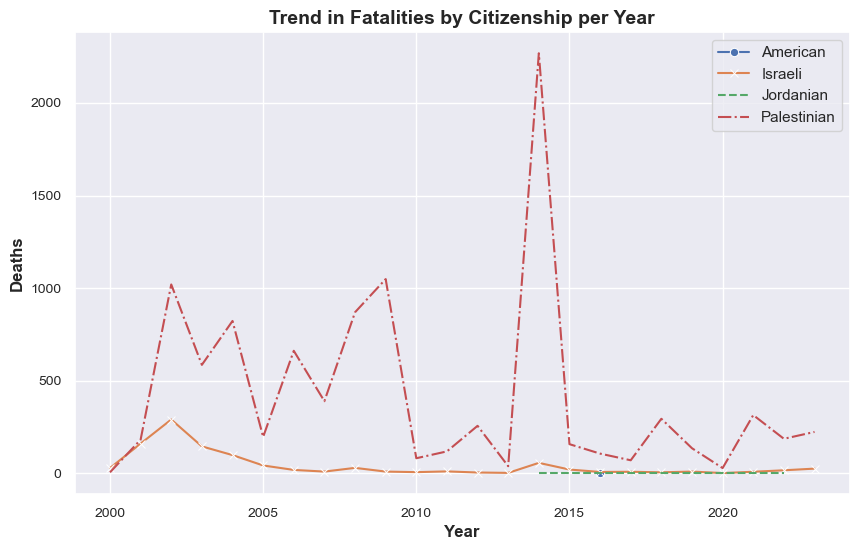

In [130]:
yearly_deaths = df.groupby([df['date_of_death'].dt.year, 'citizenship']).size()
yearly_deaths = yearly_deaths.unstack()
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(data=yearly_deaths, x=yearly_deaths.index, y='American', label='American', marker='o')
sns.lineplot(data=yearly_deaths, x=yearly_deaths.index, y='Israeli', label='Israeli', marker='x')
sns.lineplot(data=yearly_deaths, x=yearly_deaths.index, y='Jordanian', label='Jordanian', linestyle='--')
sns.lineplot(data=yearly_deaths, x=yearly_deaths.index, y='Palestinian', label='Palestinian', linestyle='-.')
plt.title('Trend in Fatalities by Citizenship per Year', fontsize=14, fontweight="bold")
plt.xlabel('Year', fontsize=12, fontweight="bold")
plt.ylabel('Deaths', fontsize=12, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

# 2- Age and Gender of Victims

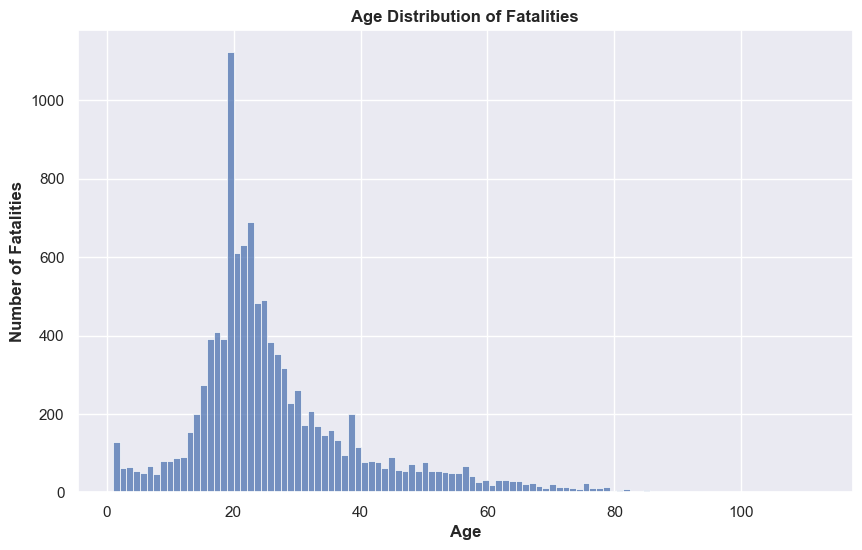

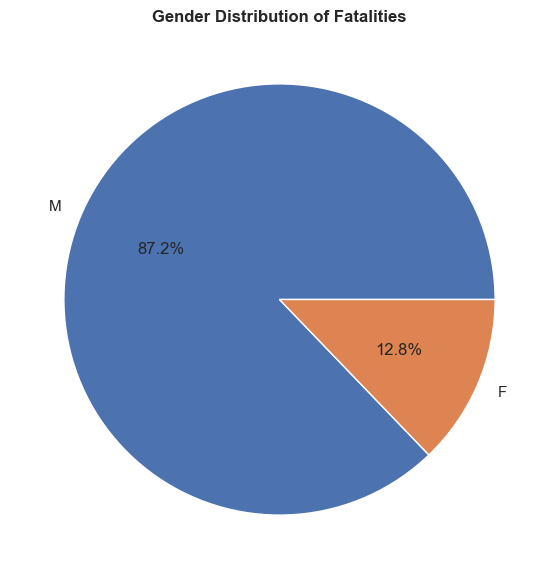

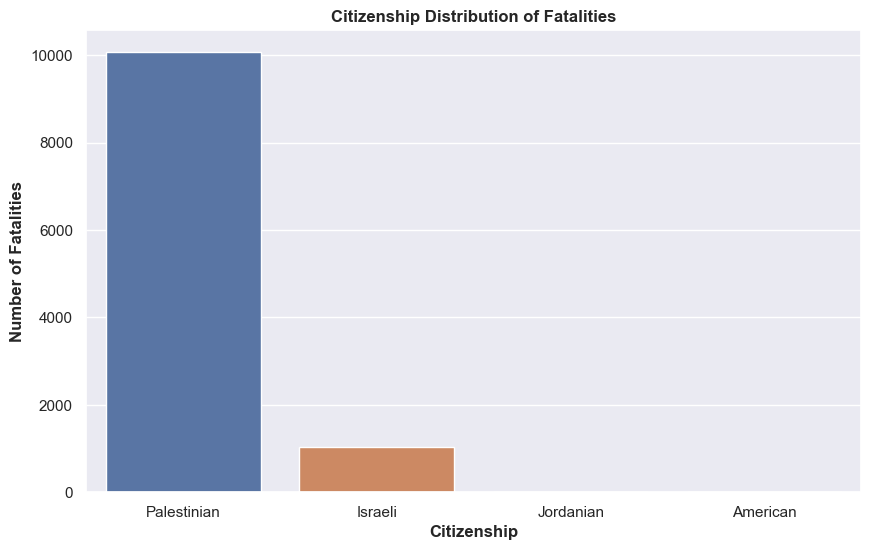

In [133]:
# 1. Age Analysis using Histogram
num_bins = int(np.sqrt(df['age'].size))
sns.histplot(df['age'], bins=num_bins)
plt.title('Age Distribution of Fatalities', fontweight="bold")
plt.xlabel('Age', fontweight="bold")
plt.ylabel('Number of Fatalities', fontweight="bold")

# 2. Gender Analysis using Pie Chart
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Fatalities', fontweight="bold")

# 3. Citizenship Analysis using Bar Chart
citizenship_counts = df['citizenship'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values, palette="deep")
plt.title('Citizenship Distribution of Fatalities', fontweight="bold")
plt.xlabel('Citizenship', fontweight="bold")
plt.ylabel('Number of Fatalities', fontweight="bold")

plt.show()

# 3- Fatalites Per Area of Residence

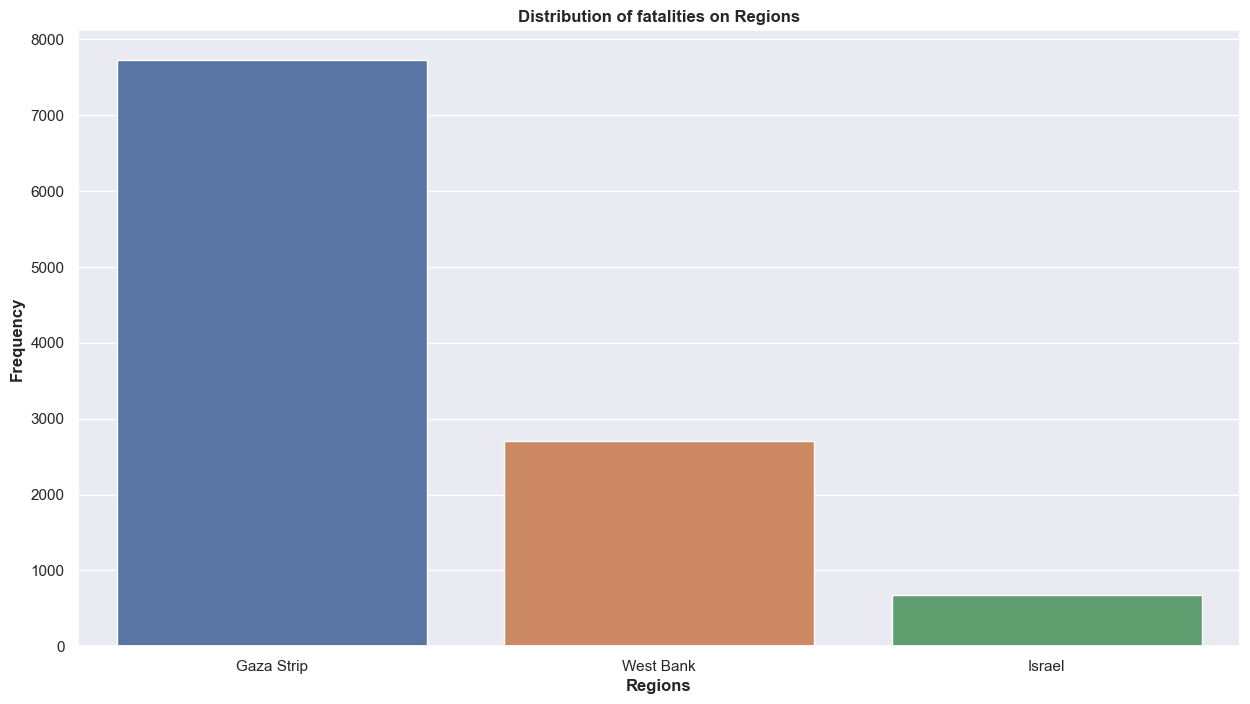

In [100]:
event_location_counts = df['event_location_region'].value_counts()
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x=event_location_counts.index, y=event_location_counts.values, palette='deep')
plt.title('Distribution of fatalities on Regions', fontweight="bold")
plt.xlabel('Regions', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

#                                            4-    Inflicted Injuries

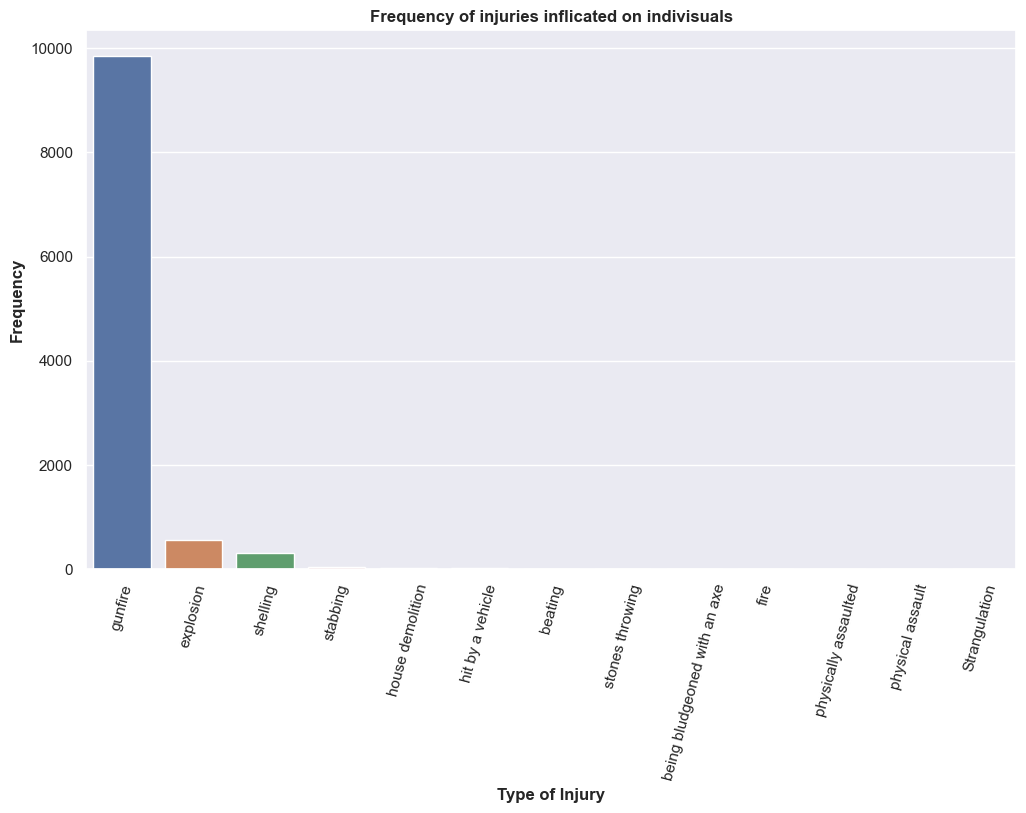

In [101]:
injury_inflicated = df['type_of_injury'].value_counts()
sns.set(rc={'figure.figsize':(12,7)})

sns.barplot(x=injury_inflicated.index, y=injury_inflicated.values, palette= "deep")
plt.title('Frequency of injuries inflicated on indivisuals', fontweight="bold")
plt.xlabel('Type of Injury', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.xticks(rotation=75)
plt.show()

# 5- Ammunitions and Means of Fatalities

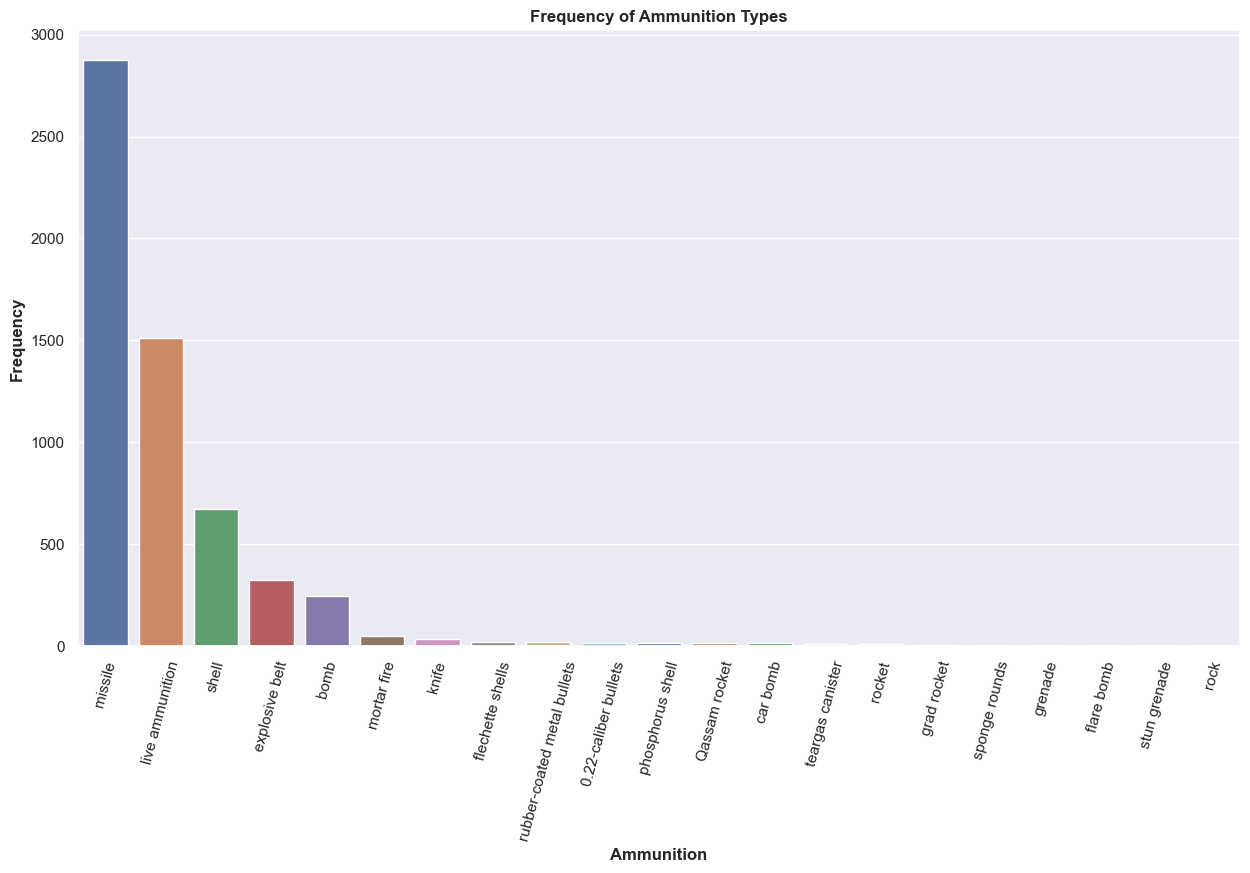

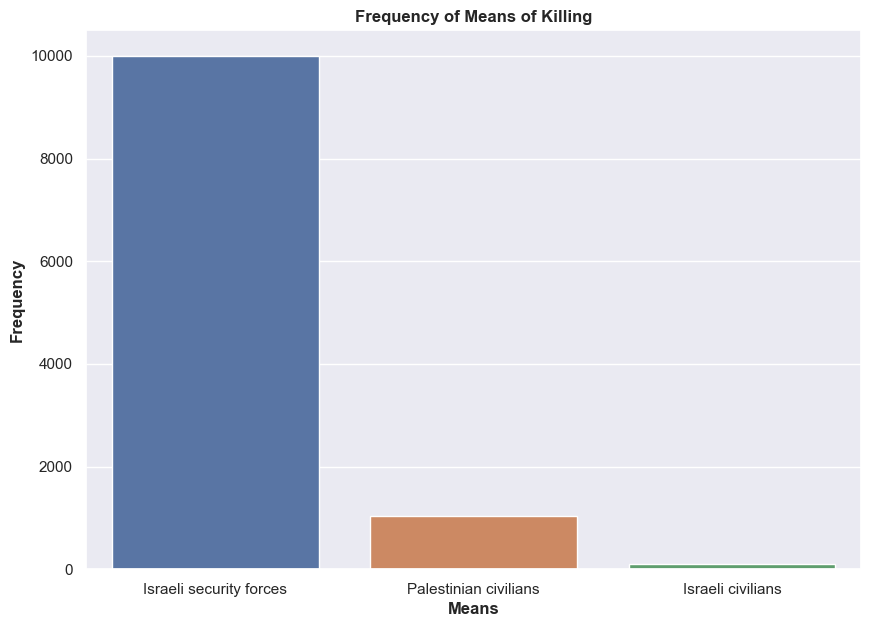

In [102]:
ammunition_type_counts = df['ammunition'].value_counts()
killedBy_counts = df['killed_by'].value_counts()
sns.set(rc={'figure.figsize':(15,8)})

# Plot for Ammunition Types
sns.barplot(x=ammunition_type_counts.index, y=ammunition_type_counts.values, palette="deep")
plt.title('Frequency of Ammunition Types', fontweight="bold")
plt.xlabel('Ammunition', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.xticks(rotation=75)
plt.show()

sns.set(rc={'figure.figsize':(10,7)})
# Plot for Means of Killing
sns.barplot(x=killedBy_counts.index, y=killedBy_counts.values, palette="deep")
plt.title('Frequency of Means of Killing', fontweight="bold")
plt.xlabel('Means', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

# 6- Victim Profile Based on Age, Gender, Residence and Citizenship

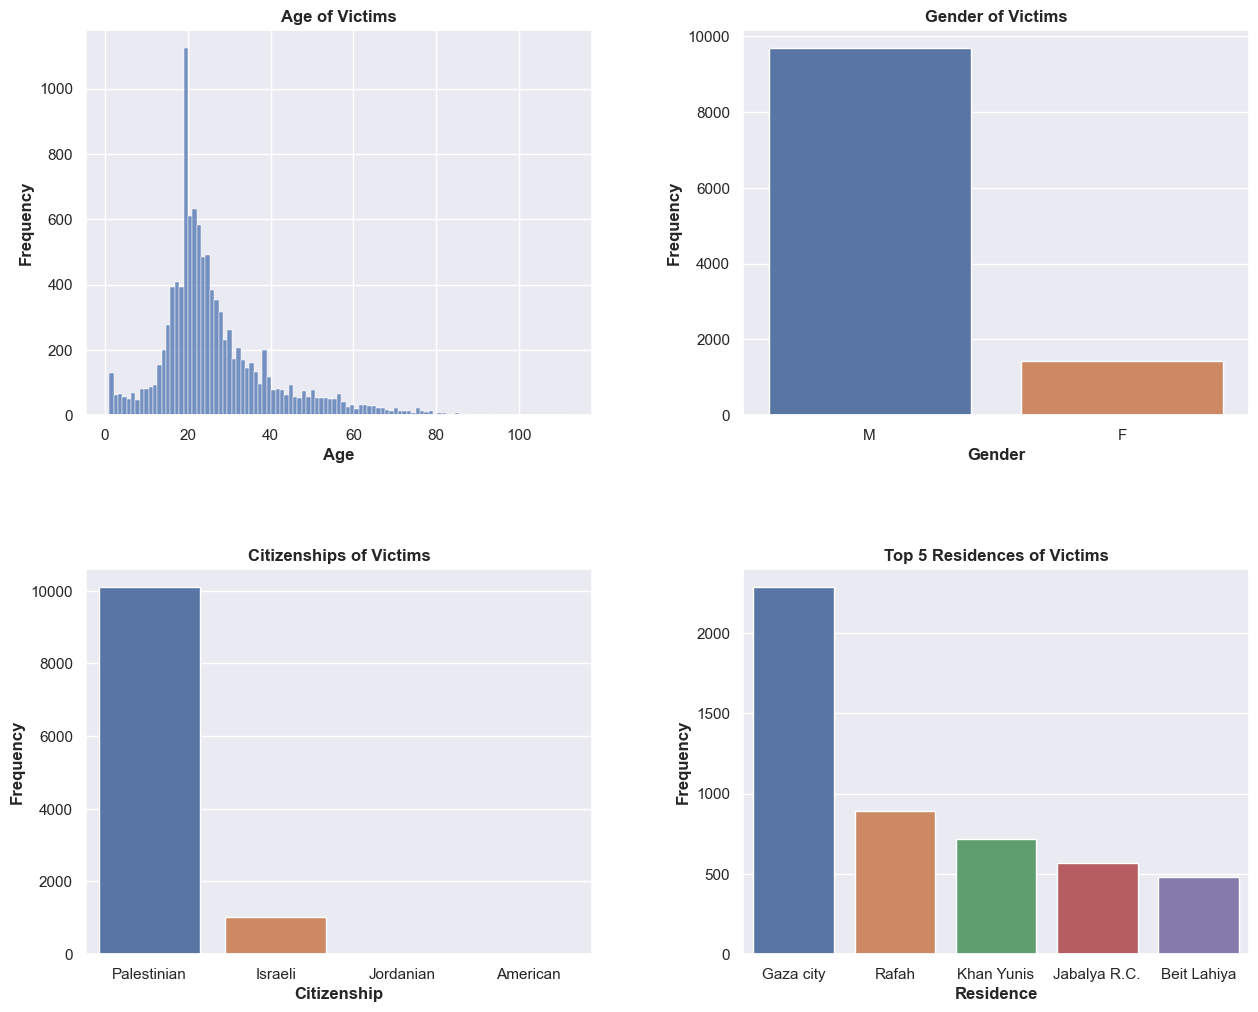

In [99]:
age = df['age'].describe()
gender = df['gender'].value_counts()
citizenship = df['citizenship'].value_counts()
residence_all = df['place_of_residence'].value_counts()
residence = residence_all.head()
sns.set(rc={'figure.figsize':(15,12)})

# Age distribution plot
num_bins = int(np.sqrt(df['age'].size))
plt.subplot(2, 2, 1) #1st subplot
sns.histplot(df['age'], bins=num_bins)
plt.title('Age of Victims', fontweight="bold")
plt.xlabel('Age', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")

# Gender distribution plot
plt.subplot(2, 2, 2)  #2nd subplot
sns.barplot(x=gender.index, y=gender.values, palette="deep")
plt.title('Gender of Victims', fontweight="bold")
plt.xlabel('Gender', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")

# Citizenship distribution plot
plt.subplot(2, 2, 3)  #3rd subplot
sns.barplot(x=citizenship.index, y=citizenship.values, palette="deep")
#plt.bar(citizenship.index, citizenship.values, color='red')
plt.title('Citizenships of Victims', fontweight="bold")
plt.xlabel('Citizenship', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")

# Top 5 places of residence distribution plot
plt.subplot(2, 2, 4)  #4th subplot
sns.barplot(x=residence.index, y=residence.values, palette="deep")
plt.title('Top 5 Residences of Victims', fontweight="bold")
plt.xlabel('Residence', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()